In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('data/ex1data1.txt', sep=',',header=None)  #loading data in dataframe

In [4]:
data.columns = ["x","y"] #Assigning columns
data['ones'] = 1 #adding an extra column 1 to the data frame

In [5]:
x = np.array(data['x']) #loading x from the dataframe
y = np.array(data['y']) #loading y from the dataframe

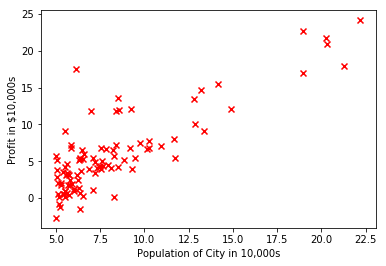

In [7]:
plt.scatter(x,y,c='r',marker = 'x') #plotting data on the graph
plt.xlabel('Population of City in 10,000s') #setting the label
plt.ylabel('Profit in $10,000s') #setting the label
plt.show() #show

In [8]:
x_array = data[['ones','x']].values #loading data into numpy array from pandas dataframe
y_array = data[['y']]

In [9]:
def compute_cost(x,theta,y):
    predicted_value = np.dot(x,theta) #computing predicted
    diffrence = (predicted_value - y)
    cost = np.sum(np.power(diffrence,2))
    return cost


In [10]:
def gradientDescent(x,y,theta,alpha,num_iterations):
    i = 0
    while i < num_iterations:
        i = i+1
        predicted_cost = np.dot(x,theta)
        diffrence = (predicted_cost - y)
        denominator = x.shape[0]
        theta = theta - (alpha/denominator) * np.dot(x.T,diffrence)
        if i%100 == 0:
            print("Cost for"+str(i)+"="+str(compute_cost(x,theta,y)))
    return theta


In [11]:
theta = gradientDescent(x_array,y_array,np.zeros([2,1]),0.01,1500)

Cost for100=y    1063.115263
dtype: float64
Cost for200=y    1004.173675
dtype: float64
Cost for300=y    963.086237
dtype: float64
Cost for400=y    934.444702
dtype: float64
Cost for500=y    914.479049
dtype: float64
Cost for600=y    900.561244
dtype: float64
Cost for700=y    890.859318
dtype: float64
Cost for800=y    884.096227
dtype: float64
Cost for900=y    879.381762
dtype: float64
Cost for1000=y    876.095368
dtype: float64
Cost for1100=y    873.804464
dtype: float64
Cost for1200=y    872.207503
dtype: float64
Cost for1300=y    871.094282
dtype: float64
Cost for1400=y    870.31827
dtype: float64
Cost for1500=y    869.777322
dtype: float64


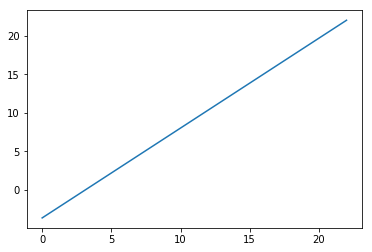

In [12]:
xx = np.arange(0,data['x'].max())
z = np.ones((xx.shape[0],1))
yy = np.dot(np.column_stack((z,xx)),theta)

plt.plot(xx,yy,label='Linear regression (Gradient Descent)')


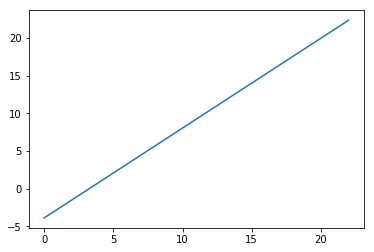

In [14]:
regr = LinearRegression()
regr.fit(data[['x']].values.reshape(-1,1), data[['y']].values)

xx = xx.reshape(xx.shape[0],-1)
# print((regr.coef_*xx).shape)
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')
plt.show()

In [15]:
print(gradientDescent(x_array,y_array,np.zeros([2,1]),0.01,1500))
compute_cost(x_array,np.zeros([2,1]),y_array)

Cost for100=y    1063.115263
dtype: float64
Cost for200=y    1004.173675
dtype: float64
Cost for300=y    963.086237
dtype: float64
Cost for400=y    934.444702
dtype: float64
Cost for500=y    914.479049
dtype: float64
Cost for600=y    900.561244
dtype: float64
Cost for700=y    890.859318
dtype: float64
Cost for800=y    884.096227
dtype: float64
Cost for900=y    879.381762
dtype: float64
Cost for1000=y    876.095368
dtype: float64
Cost for1100=y    873.804464
dtype: float64
Cost for1200=y    872.207503
dtype: float64
Cost for1300=y    871.094282
dtype: float64
Cost for1400=y    870.31827
dtype: float64
Cost for1500=y    869.777322
dtype: float64
[[-3.63029144]
 [ 1.16636235]]


y    6222.110372
dtype: float64